# Libraries & Data Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
sales = pd.read_csv('C:\\Users\\podop\\OneDrive\\Dokument\\Capstone\\Rohlik Project\\rohlik-sales-forecasting-challenge-v2\\data\\sales_train.csv')
inventory = pd.read_csv('C:\\Users\\podop\OneDrive\\Dokument\\Capstone\\Rohlik Project\\rohlik-sales-forecasting-challenge-v2\\data\\inventory.csv')

In [3]:
df = pd.merge(sales, inventory, how = 'left', on = 'unique_id')


In [4]:
df['discount'] = df.iloc[:, df.columns.get_loc('type_0_discount'): 
                                              df.columns.get_loc('type_6_discount') + 1].max(axis=1)
df.drop(columns = ['type_0_discount','type_1_discount','type_2_discount','type_3_discount', 'type_4_discount','type_5_discount','type_6_discount','warehouse_y'], inplace = True)
df = df.rename(columns = {'warehouse_x':'warehouse'})

In [5]:
df.dropna(inplace = True)

In [6]:
df['date'] = pd.to_datetime(df['date'])
df

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,0.15312
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,0.15025
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,0.15025
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,0.20024
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,0.15649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007414,4941,2023-06-21,Prague_1,9988.0,26.56,34.06,1.00,2422,Kohlrabi_9,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_114,Fruit and vegetable_L4_1,0.00000
4007415,4941,2023-06-24,Prague_1,8518.0,27.42,34.06,1.00,2422,Kohlrabi_9,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_114,Fruit and vegetable_L4_1,0.00000
4007416,4941,2023-06-23,Prague_1,10424.0,33.39,34.06,1.00,2422,Kohlrabi_9,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_114,Fruit and vegetable_L4_1,0.00000
4007417,4941,2023-06-22,Prague_1,10342.0,22.88,34.06,1.00,2422,Kohlrabi_9,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_114,Fruit and vegetable_L4_1,0.00000


In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()


In [8]:
df

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,discount,year,month,day_of_week
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,0.15312,2024,3,Sunday
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,0.15025,2021,5,Tuesday
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,0.15025,2021,12,Monday
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,0.20024,2023,4,Saturday
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,2375,Croissant_35,Bakery,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,0.15649,2022,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007414,4941,2023-06-21,Prague_1,9988.0,26.56,34.06,1.00,2422,Kohlrabi_9,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_114,Fruit and vegetable_L4_1,0.00000,2023,6,Wednesday
4007415,4941,2023-06-24,Prague_1,8518.0,27.42,34.06,1.00,2422,Kohlrabi_9,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_114,Fruit and vegetable_L4_1,0.00000,2023,6,Saturday
4007416,4941,2023-06-23,Prague_1,10424.0,33.39,34.06,1.00,2422,Kohlrabi_9,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_114,Fruit and vegetable_L4_1,0.00000,2023,6,Friday
4007417,4941,2023-06-22,Prague_1,10342.0,22.88,34.06,1.00,2422,Kohlrabi_9,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_114,Fruit and vegetable_L4_1,0.00000,2023,6,Thursday


# Univariate Analysis

## Numerical Variables

Text(0.5, 1.0, 'Distribution of Sales')

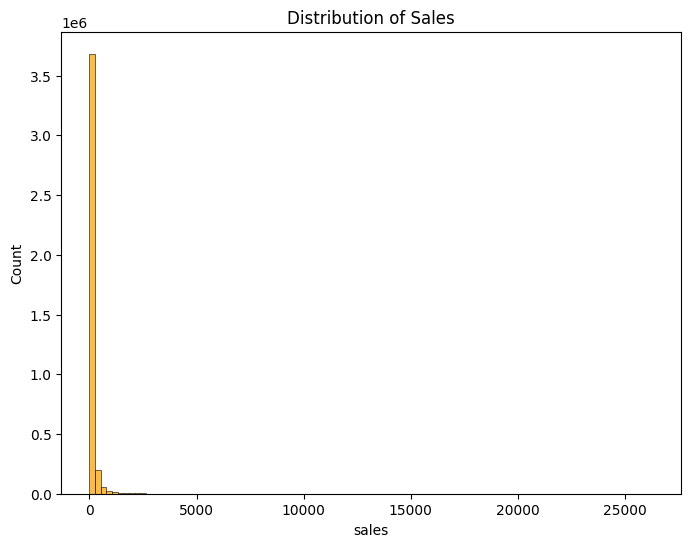

In [25]:
# Sales
plt.figure(figsize=(8, 6))
sns.histplot(df['sales'], bins = 100, color='orange')  # kde=True adds a Kernel Density Estimate
plt.title('Distribution of Sales')

In [10]:
import numpy as np
df['log_sales'] = np.log1p(df['sales'])

Text(0.5, 1.0, 'Distribution of Logged Sales')

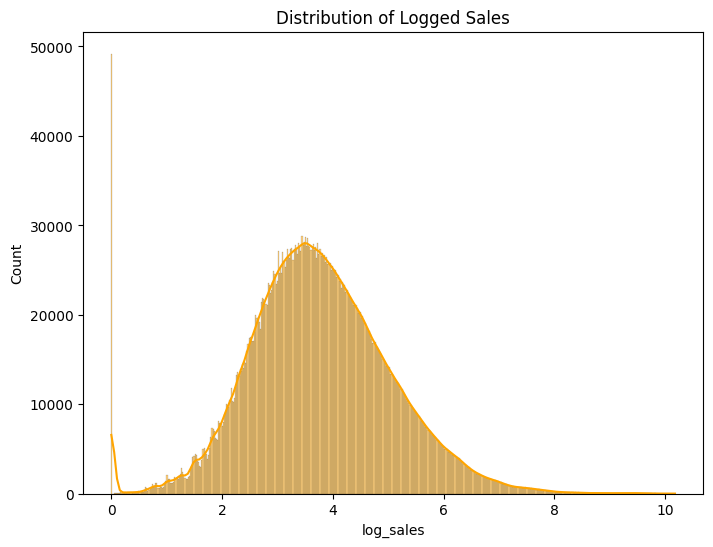

In [11]:
# Log Sales
plt.figure(figsize=(8, 6))
sns.histplot(df['log_sales'], kde=True, color='orange')  # kde=True adds a Kernel Density Estimate
plt.title('Distribution of Logged Sales')

Text(0.5, 1.0, 'Distribution of Total Orders')

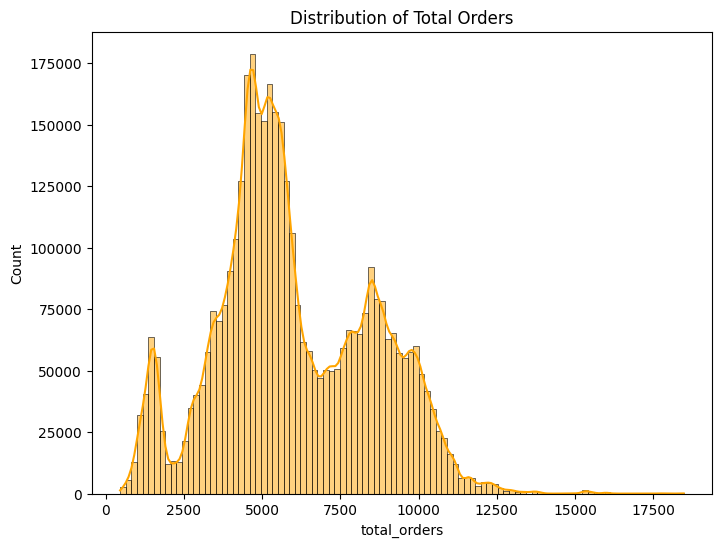

In [12]:
# Total Orders
plt.figure(figsize=(8, 6))
sns.histplot(df['total_orders'], bins = 100, kde = True, color='orange')  # kde=True adds a Kernel Density Estimate
plt.title('Distribution of Total Orders')

Text(0.5, 1.0, 'Distribution of Sell Price')

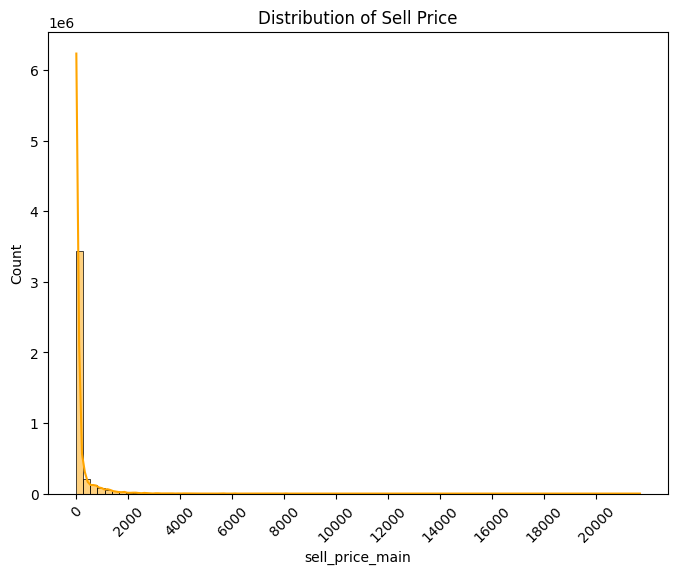

In [13]:
# Sell Price
plt.figure(figsize=(8, 6))
sns.histplot(df['sell_price_main'], bins = 80, kde=True, color='orange')  
plt.xticks(range(0, 22000, 2000), rotation = 45)
plt.title('Distribution of Sell Price')

Text(0.5, 1.0, 'Distribution of Discount')

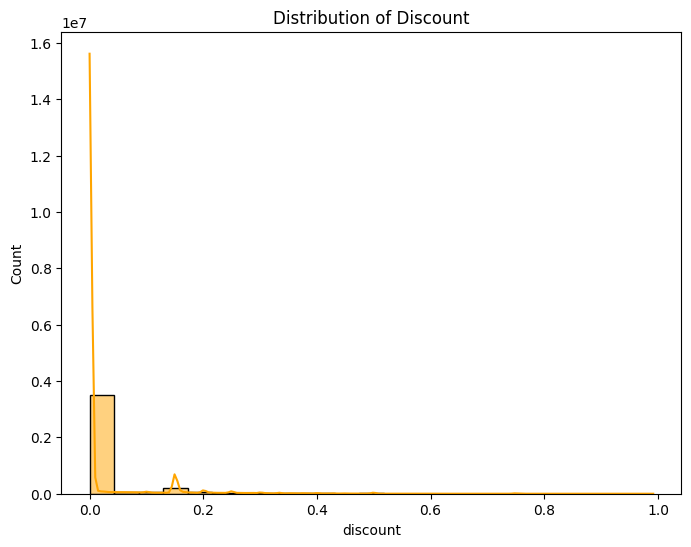

In [14]:
# Discount
plt.figure(figsize=(8, 6))
sns.histplot(df['discount'], kde=True, color='orange')  # kde=True adds a Kernel Density Estimate
plt.title('Distribution of Discount')

## Categorical Variables

Text(0.5, 1.0, 'Distribution of Categories')

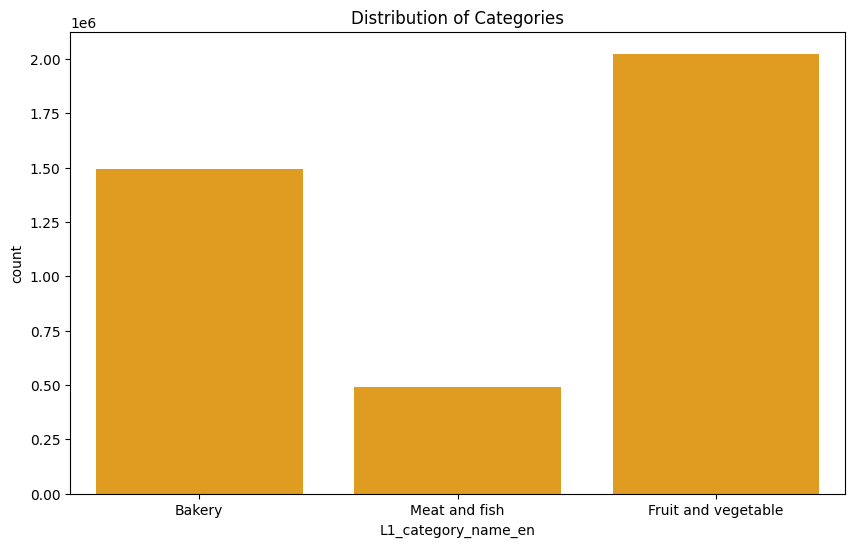

In [15]:
# Category
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'L1_category_name_en', color = 'orange')
plt.title('Distribution of Categories')


Text(0.5, 1.0, 'Distribution of Warehouses')

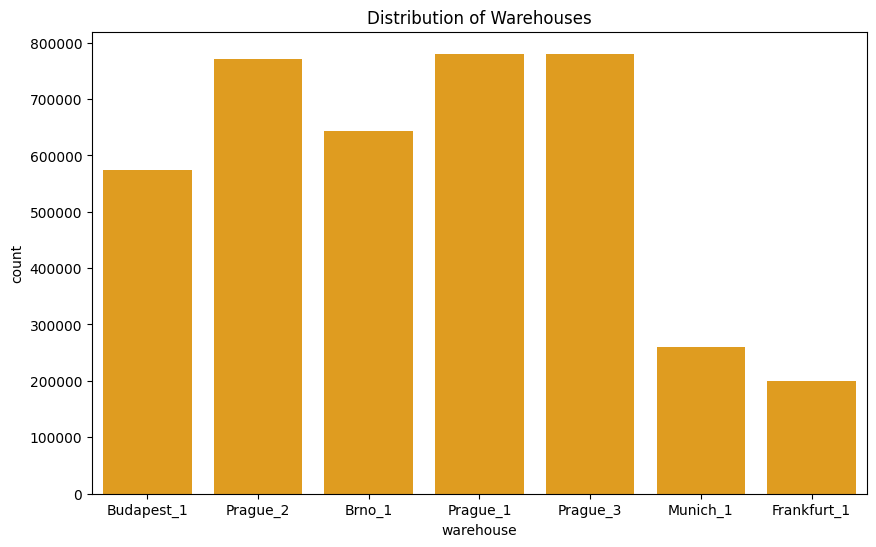

In [16]:
# Warehouse
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'warehouse', color = 'orange')
plt.title('Distribution of Warehouses')


# Multivariate Analysis

Text(0.5, 1.0, 'Correlation between Sales and Discount')

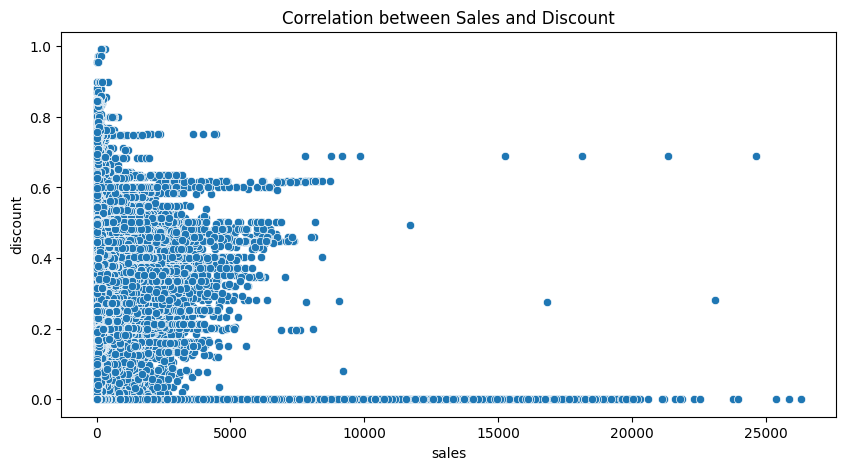

In [ ]:
# Sales vs Discount
plt.figure(figsize = (10,5))
sns.scatterplot(df, x = 'sales', y = 'discount')
plt.title('Correlation between Sales and Discount')

Text(0.5, 1.0, 'Correlation between Sales and Sell Price')

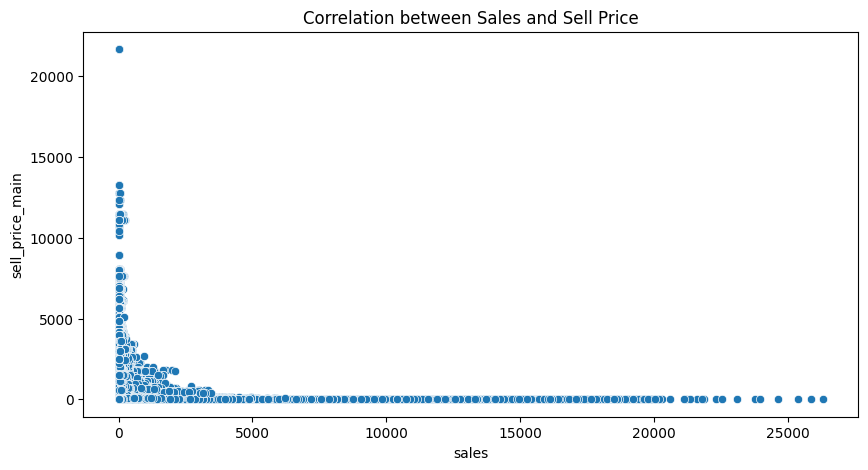

In [ ]:
# Sales vs Sell Price
plt.figure(figsize = (10,5))
sns.scatterplot(df, x = 'sales', y = 'sell_price_main')
plt.title('Correlation between Sales and Sell Price')

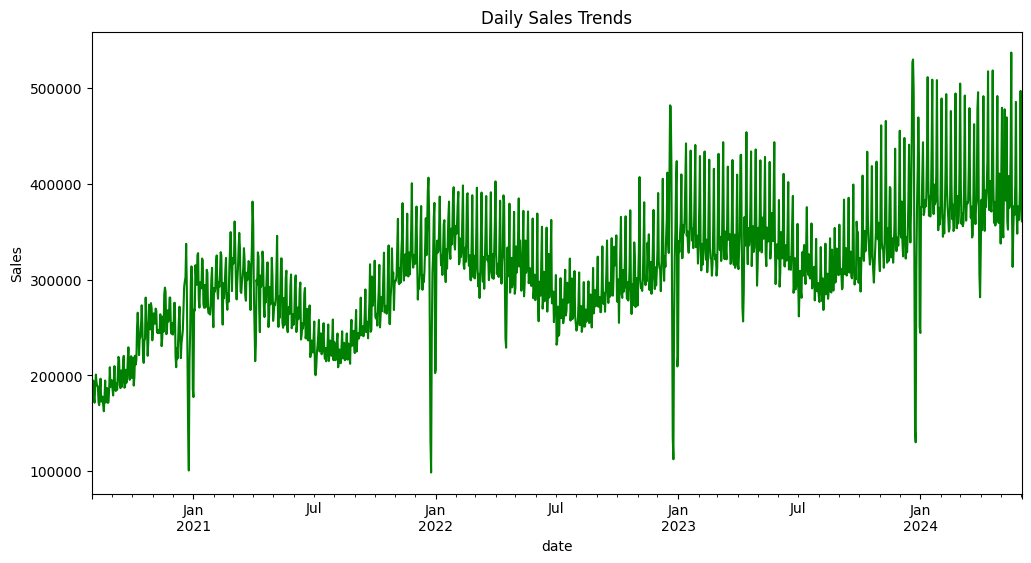

In [19]:
daily_sales = df.groupby('date')['sales'].sum()
daily_sales.plot(title="Daily Sales Trends", figsize=(12, 6), color='green')
plt.ylabel("Sales")
plt.show()

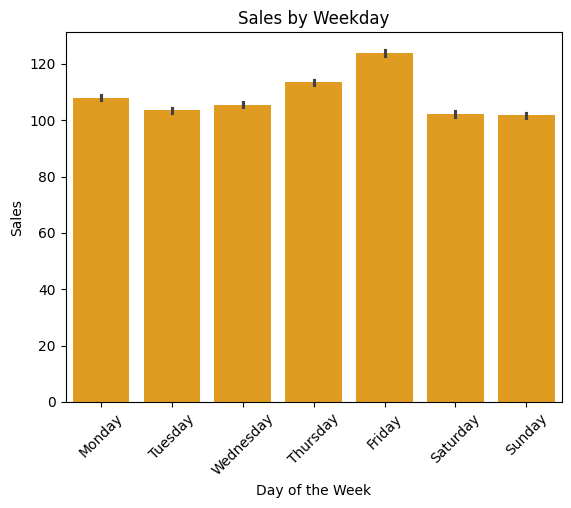

In [20]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(df, x = 'day_of_week', y = 'sales', order = weekday_order, color = 'orange')
plt.title('Sales by Weekday')
plt.xlabel("Day of the Week")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.show()


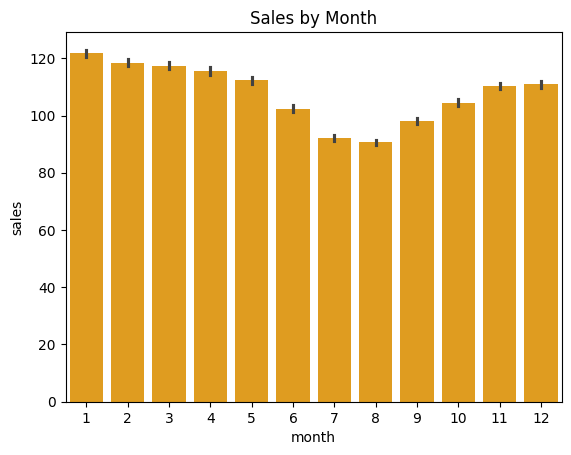

In [21]:
sns.barplot(df, x = 'month', y = 'sales', color = 'orange')
plt.title('Sales by Month')
plt.show()

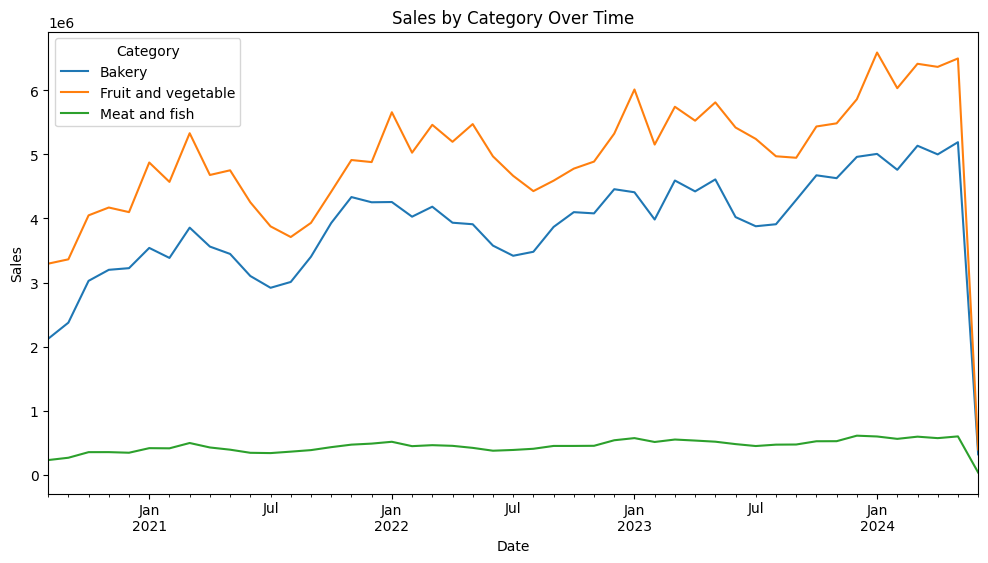

In [22]:
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')
df_grouped = df.groupby(['year_month', 'L1_category_name_en'])['sales'].sum().unstack()
df_grouped.plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Category Over Time')
plt.legend(title='Category')
plt.show()

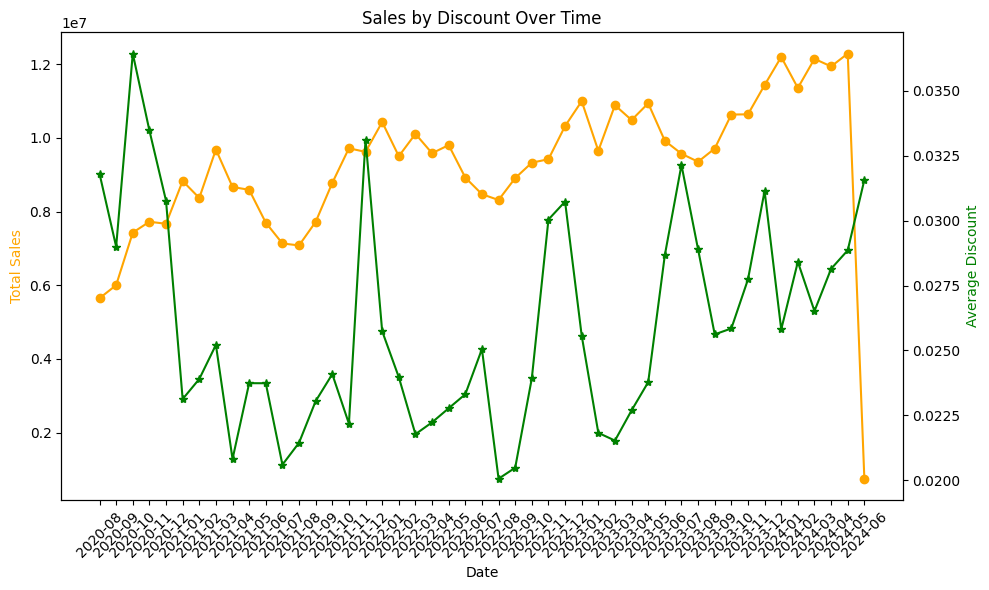

In [23]:
df['month'] = df['date'].dt.to_period('M')  
df_grouped = df.groupby('month').agg({'sales': 'sum', 'discount': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
# first axis sales 
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color='orange')
ax1.plot(df_grouped['month'].astype(str), df_grouped['sales'], color='orange', label='Sales', marker='o')
plt.xticks(rotation=45)
# second y-axis for discount
ax2 = ax1.twinx()
ax2.set_ylabel('Average Discount', color='green')
ax2.plot(df_grouped['month'].astype(str), df_grouped['discount'], color='green', label='Discount', marker='*')

plt.title('Sales by Discount Over Time')
fig.tight_layout()  
plt.show()